# **Final Project**


In [ ]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scipy
%pip install statsmodels

## Import Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

Read in the csv file from the url using the request library


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

## Task 4: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

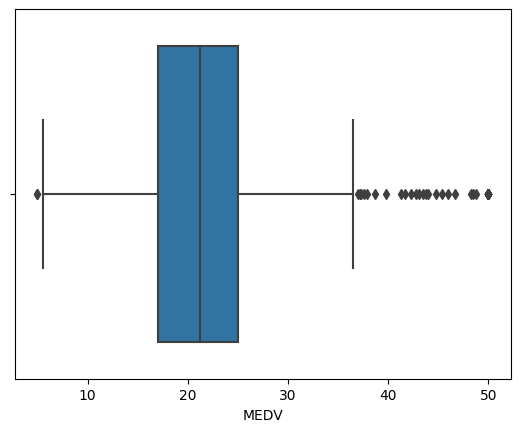

In [4]:
ax = sns.boxplot(x='MEDV', data=boston_df)

### Provide a  histogram for the Charles river variable

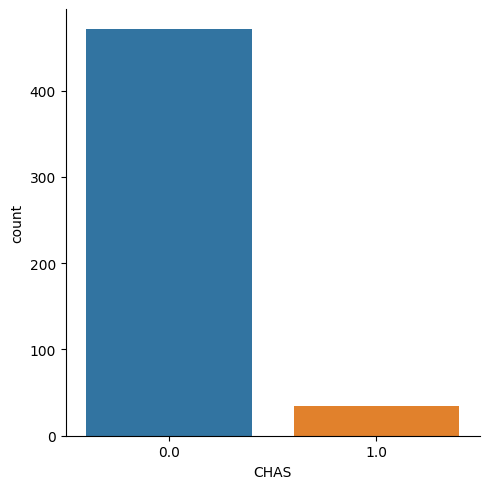

In [5]:
ax2 = sns.catplot(x='CHAS', kind='count', data=boston_df)

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
for i in range(506):
    if boston_df.loc[i, 'AGE'] <= 35:
        boston_df.loc[i, 'AGE'] = 'Young'
    elif boston_df.loc[i, 'AGE'] < 70:
        boston_df.loc[i, 'AGE'] = 'Mid Age'
    else:
        boston_df.loc[i, 'AGE'] = 'Old'

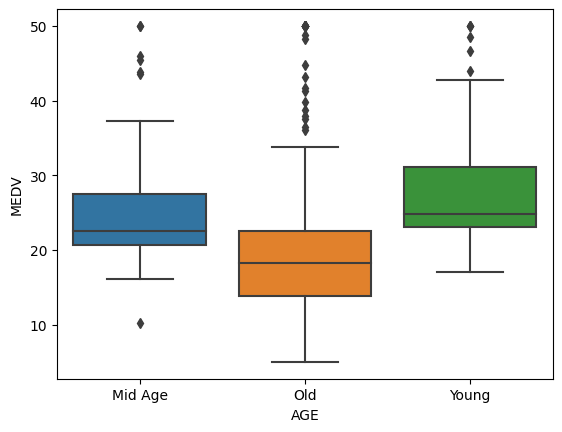

In [7]:
ax3 = sns.boxplot(x="AGE", y="MEDV", data=boston_df)

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

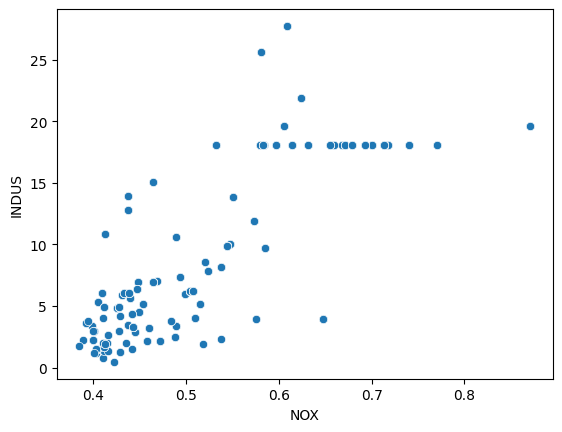

In [8]:
ax4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

### Create a histogram for the pupil to teacher ratio variable

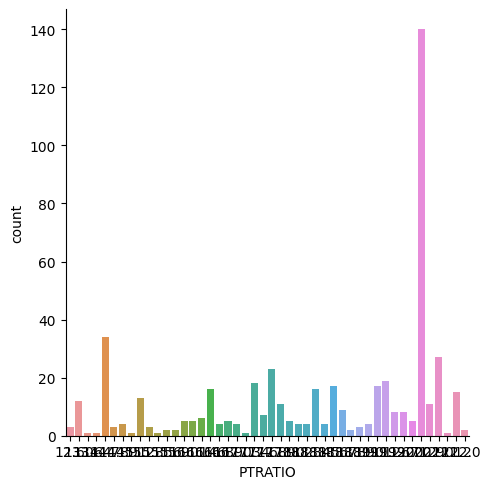

In [9]:
ax5 = sns.catplot(x='PTRATIO', kind='count', data=boston_df)

## Task 5: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [10]:

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river nad not bounded by the Charles river

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [11]:
young  = boston_df[boston_df['AGE'] == 'Young']['MEDV']
midAge = boston_df[boston_df['AGE'] == 'Mid Age']['MEDV']
old    = boston_df[boston_df['AGE'] == 'Old']['MEDV']

In [12]:
f_statistic, p_value = scipy.stats.f_oneway(young, midAge, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [14]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)



In [15]:
y0, y1 = predictions.iloc[0], predictions.iloc[1]
x0, x1 = X.iloc[0,1], X.iloc[1,1]
print((y0-y1)/(x0-x1))

1.0916130158411068
